In [205]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from keras import models, layers, optimizers, datasets, utils, losses
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255


Taking 1024 training and 501 testing samples

In [206]:
x_train = x_train[:1024,:]
xl=x_train
x_test = x_test[:501,:]
y_train = y_train[:1024]
y_test=y_test[:501]

Preprocessing data

In [207]:
yl=y_train
y_test = y_test[:501]
y_test_binary=np.zeros((501,8))
test_count=0
for y in y_test:
  ascii_y=ord(str(y))
  binary_y='{0:08b}'.format(ascii_y)
  binary_y=np.array([int(str_y) for str_y in list(binary_y)])
  y_test_binary[test_count]=binary_y
  test_count+=1
y_train_binary = np.zeros((1024,8))
counter =0 
for y in y_train:
  ascii_y=ord(str(y))
  binary_y='{0:08b}'.format(ascii_y)
  binary_y=np.array([int(str_y) for str_y in list(binary_y)])
  y_train_binary[counter]=binary_y
  counter+=1
print(y_train_binary[0])
   



[0. 0. 1. 1. 0. 1. 0. 1.]


In [208]:
#alpha = 0.01
x_train=x_train.T
x_test=x_test.T
print(x_train.shape)
x_train = np.append(x_train, [[1]*1024], axis=0)
x_test = np.append(x_test, [[1]*501], axis=0)
X=x_train
y_test_binary=y_test_binary.T
print(y_test_binary.shape)
Y=y_train_binary.T

(784, 1024)
(8, 501)


1 hidden Layer

(1024, 8)
94.43359375


Text(0, 0.5, 'Error')

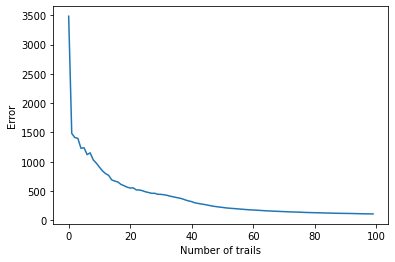

In [202]:
#using 1 layer
print(y_train_binary.shape)

#model specifications
Ni=785; Nh=100 ; No=8 ;

#parameters and array intilization
#adding a layer
#np.random.seed(0)
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err1=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.01*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh 
    err1=np.append(err1, np.sum(abs(Y-(y))))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)
plt.plot(err1)
plt.xlabel("Number of trails")
plt.ylabel("Error")



In [83]:
print(err1[-1])

94.39671228974393


2 hidden layers with 100 neurons


23.046875


Text(0, 0.5, 'Error')

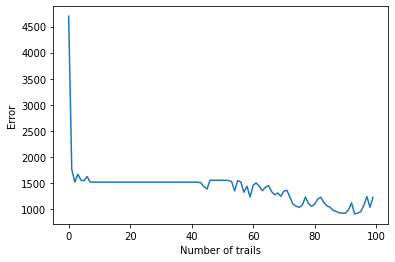

In [107]:
# 2 hidden  Layer

#model specifications
Ni=785; Nh=100; Nh1=100 ; N0=8

#parameters and array intilization
#adding a
Ntrails=100; 
wh=np.random.randn(Nh,Ni);
wh1=np.random.randn(Nh1,Nh);
dwh=np.zeros(wh.shape);
dwh1=np.zeros(wh1.shape);
w0=np.random.randn(N0,Nh1);
dw0=np.zeros(w0.shape)
err2=np.array([])

for trail in range(Ntrails):
    h=1/(1+np.exp(-wh@X))
    h1=1/(1+np.exp(-wh1@h))  
    y=1/(1+np.exp(-w0@h1))
   
    d0=y*(1-y)*(Y-y)
    dh1=h1*(1-h1)*(w0.transpose()@d0)
    dh=h*(1-h)*(wh1.transpose()@dh1)
    #update weights with momentum
    dw0 = 0.9*dw0+d0@h1.T
    dw0=d0@h1.T
    w0=w0+0.01*dw0
    dwh1=dh1@h.T
    dwh1=0.9*dwh1+dh1@h.T
    wh1=wh1+0.01*dwh1
    dwh=dh@X.T
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh
    err2=np.append(err2,np.sum(abs(Y-y)))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)
plt.plot(err2)
plt.xlabel("Number of trails")
plt.ylabel("Error")

In [109]:
print(err2[-1])

1223.2695795983186


5 hidden layers with 128 neurons


9.86328125


Text(0, 0.5, 'Error')

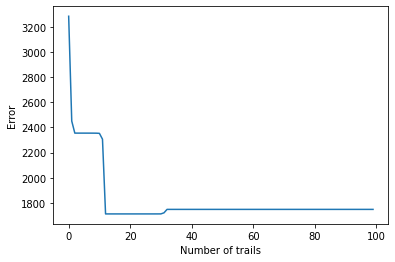

In [108]:
#5 hidden LAYERS
#model specifications
Ni=785; Nh=128; Nh1=128 ; Nh2=128; Nh3=128; Nh4=128; N0=8

#parameters and array intilization
#adding a
Ntrails=100; 
w0=np.random.randn(N0,Nh4);
wh=np.random.randn(Nh,Ni);
wh1=np.random.randn(Nh1,Nh);
wh2=np.random.randn(Nh2,Nh1);
wh3=np.random.randn(Nh3,Nh2);
wh4=np.random.randn(Nh4,Nh3);
dw0=np.zeros(w0.shape)
dwh=np.zeros(wh.shape);
dwh1=np.zeros(wh1.shape);
dwh2=np.zeros(wh2.shape);
dwh3=np.zeros(wh3.shape);
dwh4=np.zeros(wh4.shape);
err3=np.array([])

for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    h1=1/(1+np.exp(-wh1@h))
    h2=1/(1+np.exp(-wh2@h1))
    h3=1/(1+np.exp(-wh3@h2))
    h4=1/(1+np.exp(-wh4@h3))
    y=1/(1+np.exp(-w0@h4))
    d0=y*(1-y)*(Y-y)
    dw0=0.9*dw0+d0@h4.T
    w0=w0+0.01*dw0
    dh4=h4*(1-h4)*(w0.transpose()@d0)
    dwh4=0.9*dwh4+dh4@h3.T
    wh4=wh4+0.01*dwh4
    dh3=h3*(1-h3)*(wh4.transpose()@dh4)
    dwh3=0.9*dwh3+dh3@h2.T
    wh3=wh3+0.01*dwh3
    dh2=h2*(1-h2)*(wh3.transpose()@dh3)
    dwh2=0.9*dwh2+dh2@h1.T
    wh2=wh2+0.01*dwh2
    dh1=h1*(1-h1)*(wh2.transpose()@dh2)
    dwh1=0.9*dwh1+dh1@h.T
    wh1=wh1+0.01*dwh1
    dh=h*(1-h)*(wh1.transpose()@dh1)
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh
    err3=np.append(err3,np.sum(abs(Y-y)))
accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =((accuracy/1024))*100;
print(accuracy)
plt.plot(err3)
plt.xlabel("Number of trails")
plt.ylabel("Error")

In [110]:
print(err3[-1])

1749.0001107910086


plooting error learning curve for different layers

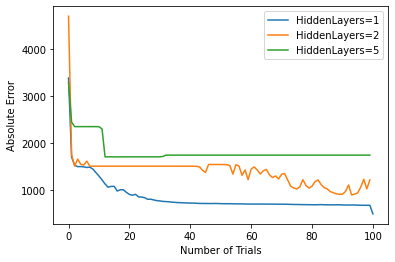

In [111]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err1)
plt.plot(err2)
plt.plot(err3)
plt.legend(['HiddenLayers=1', 'HiddenLayers=2', 'HiddenLayers=5'], loc='upper right')
plt.show()

Training data with learning rate 0.001 and one hidden layer

In [116]:
#using different learning rate and one hidden layer with 100 neurons and alpha = 0.001
#model specifications
Ni=785; Nh=100; No=8

#parameters and array intilization
#adding a layer
#np.random.seed(0)
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err1=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.001*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.001*dwh 
    err1=np.append(err1, np.sum(abs(Y-(y))))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)





68.06640625


In [117]:
print(err1[-1])

537.1515460751999


Training data with learning rte 0.01 and one hidden layer

In [123]:
#aplha=0.01
#model specifications
Ni=785; Nh=100; No=8

#parameters and array intilization
#adding a layer
#np.random.seed(0)
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err2=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.01*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh 
    err2=np.append(err2, np.sum(abs(Y-(y))))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)




78.02734375


Training data with learning rate 0.000001 and one hidden layer

In [125]:
#alpha=0.000001
#model specifications
Ni=785; Nh=100; 

#parameters and array intilization
#adding a layer
#np.random.seed(0)
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err3=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.00001*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.00001*dwh 
    err3=np.append(err3, np.sum(abs(Y-(y))))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)



7.32421875


In [124]:
print(err2[-1])

274.96778704732367


In [126]:
print(err3[-1])

1707.4978104158558


plotting learning curve for error for different learning rates


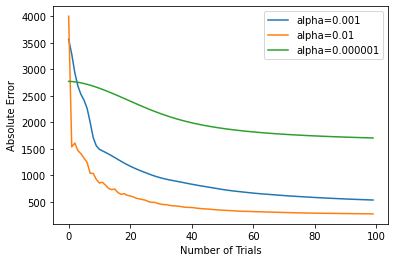

In [127]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err1)
plt.plot(err2)
plt.plot(err3)
plt.legend(['alpha=0.001', 'alpha=0.01', 'alpha=0.000001'], loc='upper right')
plt.show()

training data for 10 neurons and with one hidden layer

In [129]:
#No of neurons=10
Ni=785; Nh=10;No=8 

#parameters and array intilization
#adding a layer
#np.random.seed(0)
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err1=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.01*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh 
    err1=np.append(err3, np.sum(abs(Y-(y))))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)

68.84765625


In [130]:
print(err1[-1])

564.9354112625986


training data for 100 neurons and with one hidden layer

In [132]:
#no of neuron=100
#model specifications
Ni=785; Nh=100; No=8

#parameters and array intilization
#adding a layer
#np.random.seed(0)
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err2=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.01*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh 
    err2=np.append(err2, np.sum(abs(Y-(y))))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)


93.359375


In [133]:
print(err2[-1])

132.6368532598984


training data for 1000 neurons and with one hidden layer

In [134]:
#no of neurons =1000
#model specifications
Ni=785; Nh=1000; No=8

#parameters and array intilization
#adding a layer
#np.random.seed(0)
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err3=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.01*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh 
    err3=np.append(err3, np.sum(abs(Y-(y))))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)


34.5703125


In [135]:
print(err3[-1])

741.0800425130476


plotting learning curve for different no of neurons on hidden layer


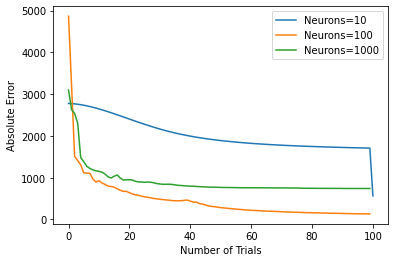

In [136]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Absolute Error")
plt.plot(err1)
plt.plot(err2)
plt.plot(err3)
plt.legend(['Neurons=10', 'Neurons=100', 'Neurons=1000'], loc='upper right')
plt.show()

Ridge regression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


72.8515625


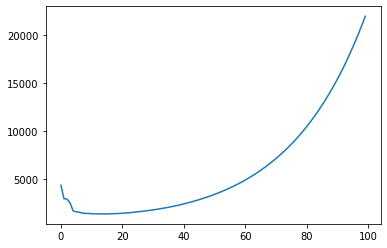

In [215]:
#1 hidden layer 
#ridge regression

#model specifications
Ni=785; Nh=100; No=8 ; lambd = 0.01

#parameters and array intilization
#adding a layer
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err1=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.01*dwo +2*lambd*wo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh +2*lambd*wh
    err1=np.append(err1, np.sum(abs(Y-(y))) + (np.sum(np.square(wo)) + np.sum(np.square(wh)))*(lambd/2))

accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)
plt.plot(err1)

Ridge regression on test data

In [216]:
h_test=1/(1+np.exp(-wh@x_test))
y_pred_test=1/(1+np.exp(-wo@h_test))
print(y_pred_test.shape)
err1=np.sum(abs(y_test_binary-y_pred_test))
print(err1)
accuracy = np.sum(np.all(y_test_binary== np.round(y_pred_test), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)

(8, 501)
365.4225098532218
24.90234375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [175]:
print(err1[-1])

21796.350030348367


Performing LASSO on traing data

76.07421875


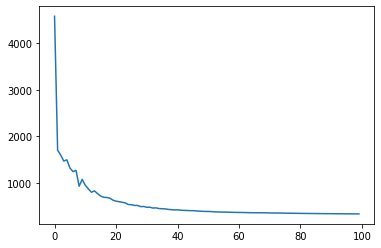

In [209]:
#LASSO regression 
#model specifications
Ni=785; Nh=100; No=8 ; lambd = 0.001

#parameters and array intilization
#adding a layer
wh=np.random.randn(Nh, Ni);
dwh= np.zeros(wh.shape)
wo=np.random.randn(No,Nh) ;
dwo=np.zeros(wo.shape)
err2=np.array([])
Ntrials=100
for trial in range(Ntrials):
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))
    do=y*(1-y)*(Y-y)
    dh=h*(1-h)*(wo.transpose()@do)
    dwo=0.9*dwo+do@h.T 
    wo=wo+0.01*dwo +lambd
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.01*dwh +lambd
    err2=np.append(err2, np.sum(abs(Y-(y))) + (lambd/2) * (np.sum(np.abs(wo)) +np.sum(np.abs(wh))))
accuracy = np.sum(np.all(Y == np.round(y), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)
plt.plot(err2)

Lasso on Test data

In [210]:
h_test=1/(1+np.exp(-wh@x_test))
y_pred_test=1/(1+np.exp(-wo@h_test))
print(y_pred_test.shape)
err1=np.sum(abs(y_test_binary-y_pred_test))
print(err1)
accuracy = np.sum(np.all(y_test_binary== np.round(y_pred_test), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)

(8, 501)
300.30981519621906
28.7109375


In [173]:
print(err2[-1])

140.48074982952437


plotting error for ridge and LASSO

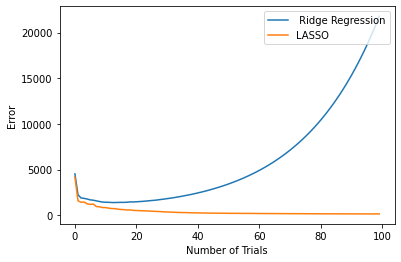

In [174]:
import matplotlib.pyplot as plt
plt.xlabel("Number of Trials")
plt.ylabel("Error")
plt.plot(err1)
plt.plot(err2)
plt.legend([' Ridge Regression', 'LASSO'], loc='upper right')
plt.show()

Testing model on test data


In [203]:
#testing
h_test=1/(1+np.exp(-wh@x_test))
y_pred_test=1/(1+np.exp(-wo@h_test))
print(y_pred_test.shape)
err1=np.sum(abs(y_test_binary-y_pred_test))
print(err1)
accuracy = np.sum(np.all(y_test_binary== np.round(y_pred_test), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)


(8, 501)
253.17553665460753
33.30078125


Adding noise to test data

In [204]:
#adding noise

# Blur 
x_test_noise = cv2.GaussianBlur(x_test,(5,5), 0)
h_test_noise=1/(1+np.exp(-wh@x_test_noise))
y_test_predicted_noise=1/(1+np.exp(-wo@h_test_noise))
errnoise=np.sum(abs(y_test_binary-y_test_predicted_noise))
print(errnoise)
accuracy = np.sum(np.all(y_test_binary== np.round(y_test_predicted_noise), axis = 0))
accuracy =  ((accuracy/1024))*100;
print(accuracy)

646.2928591828852
13.37890625
